Precision values for evaluations/EC: [66.67, 68.89, 71.05, 75.56, 76.32, 77.78, 77.78, 80.0, 84.44, 80.0]
Recall values for evaluations/EC: [65.22, 67.39, 67.5, 73.91, 72.5, 76.09, 76.09, 78.26, 82.61, 78.26]
Plot saved to: plots\EC_precision_recall_plot.png


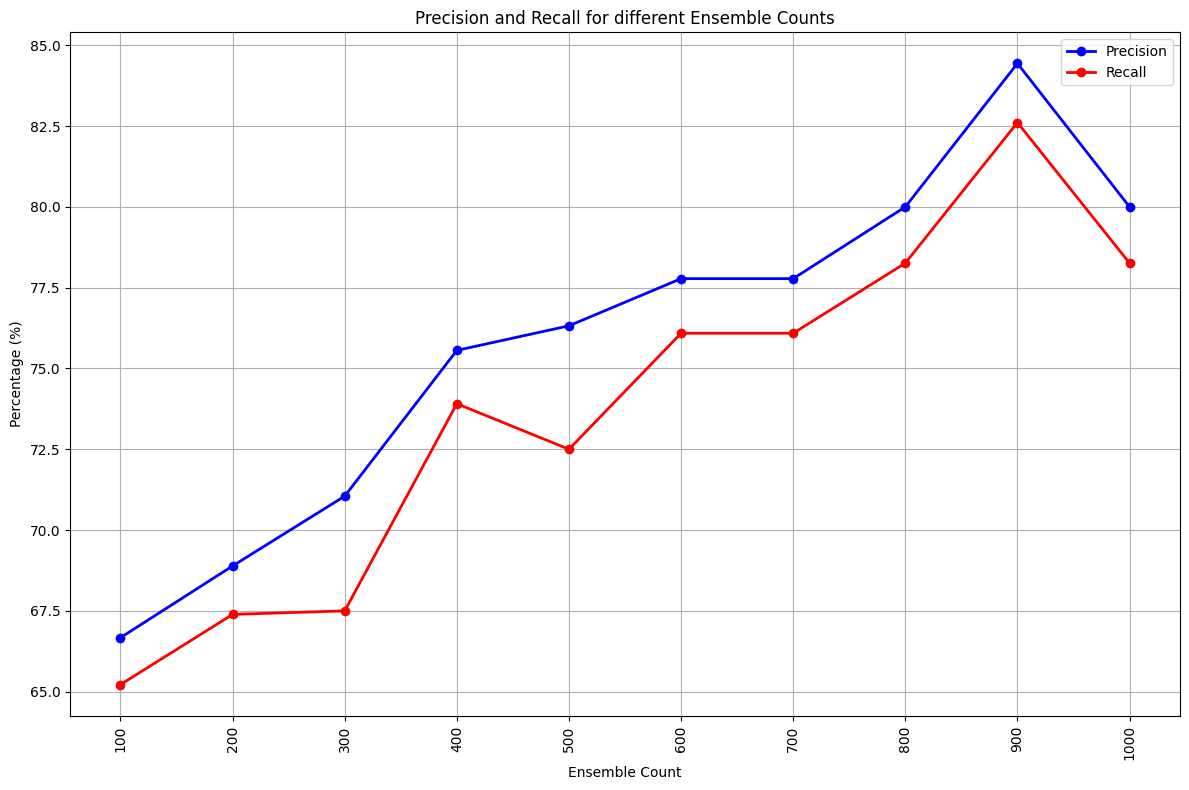

In [17]:
import os
import matplotlib.pyplot as plt
import re

# Folder to save output plots
output_folder = 'plots'
os.makedirs(output_folder, exist_ok=True)

def extract_metrics(file_path):
    """
    Reads a metrics file and extracts Precision and Recall values.
    Assumes file contains lines like:
    Precision: 85.0%
    Recall: 78.5%
    """
    precision = None
    recall = None

    with open(file_path, 'r') as f:
        for line in f:
            if "Precision" in line:
                precision_str = line.strip().split(":")[-1].replace('%', '').strip()
                precision = float(precision_str)
            elif "Recall" in line:
                recall_str = line.strip().split(":")[-1].replace('%', '').strip()
                recall = float(recall_str)

    return precision, recall


def get_trailing_number(filename):
    """
    Extracts the trailing number before .txt (e.g. results_w100.txt -> 100).
    Returns 0 if no number is found.
    """
    match = re.search(r'(\d+)(?=\.txt$)', filename)
    return int(match.group(1)) if match else 0


# Function to plot Precision and Recall for each folder
def plot_metrics():
    folders = ['evaluations/EC']  # Add more folders if needed

    for folder in folders:
        filenames = []
        precision_values = []
        recall_values = []

        # Collect only .txt files
        txt_files = [f for f in os.listdir(folder) if f.endswith('.txt')]

        # Sort using the trailing number
        for filename in sorted(txt_files, key=get_trailing_number):
            file_path = os.path.join(folder, filename)
            precision, recall = extract_metrics(file_path)

            filenames.append(filename)
            precision_values.append(precision if precision is not None else 0)
            recall_values.append(recall if recall is not None else 0)

        # Debug: print values
        print(f"Precision values for {folder}: {precision_values}")
        print(f"Recall values for {folder}: {recall_values}")

        # Extract ensemble counts from filenames (numbers only)
        ensemble_counts = [get_trailing_number(name) for name in filenames]

        # Create plot
        fig, ax = plt.subplots(figsize=(12, 8))
        ax.plot(ensemble_counts, precision_values, label='Precision', marker='o', color='b', linestyle='-', linewidth=2)
        ax.plot(ensemble_counts, recall_values, label='Recall', marker='o', color='r', linestyle='-', linewidth=2)

        ax.set_title("Precision and Recall for different Ensemble Counts")
        ax.set_xlabel("Ensemble Count")
        ax.set_ylabel("Percentage (%)")
        ax.set_xticks(ensemble_counts)
        ax.set_xticklabels(ensemble_counts, rotation=90)

        ax.grid(True)
        ax.legend()

        output_path = os.path.join(output_folder, f'{folder.split("/")[-1]}_precision_recall_plot.png')
        plt.tight_layout()
        plt.savefig(output_path)
        print(f"Plot saved to: {output_path}")
        plt.show()
        plt.close(fig)


# Call the function
plot_metrics()

